In [110]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats       import    zscore
from     statsmodels.api   import    add_constant
from     sklearn           import    metrics
from     sklearn.tree      import    DecisionTreeClassifier
from     sklearn           import    metrics,tree
from     sklearn.model_selection import train_test_split
from     IPython.display   import    Image
from     os                import    system
from     sklearn.model_selection import GridSearchCV
from     sklearn.ensemble import RandomForestClassifier
from     sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [111]:
heart=pd.read_csv('Heart.csv')
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [112]:
heart.shape

(303, 15)

In [113]:
Heart=heart.drop('Unnamed: 0',axis=1)

In [114]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 33.2+ KB


In [115]:
Heart.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [116]:
Heart.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,303,NaN,NaN,NaN,54.4389,9.03866,29,48,56,61,77
Sex,303,NaN,NaN,NaN,0.679868,0.467299,0,0,1,1,1
ChestPain,303,4,asymptomatic,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestBP,303,NaN,NaN,NaN,131.69,17.5997,94,120,130,140,200
Chol,303,NaN,NaN,NaN,246.693,51.7769,126,211,241,275,564
Fbs,303,NaN,NaN,NaN,0.148515,0.356198,0,0,0,0,1
RestECG,303,NaN,NaN,NaN,0.990099,0.994971,0,0,1,2,2
MaxHR,303,NaN,NaN,NaN,149.607,22.875,71,133.5,153,166,202
ExAng,303,NaN,NaN,NaN,0.326733,0.469794,0,0,0,1,1
Oldpeak,303,NaN,NaN,NaN,1.0396,1.16108,0,0,0.8,1.6,6.2


# NUll / Missing Value treatment -using Mode

In [117]:
Heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [118]:
Heart[Heart.Ca.isnull()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
287,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [119]:
Heart.Ca.fillna(Heart.Ca.median(),inplace=True)
Heart[Heart.Ca.isnull()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD


In [120]:
Heart[Heart.Thal.isnull()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
266,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [121]:
Heart.Thal.mode()

0    normal
dtype: object

In [122]:
Heart.Thal.fillna('normal',inplace=True)
Heart[Heart.Thal.isnull()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD


In [123]:
Heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [124]:
# converting the output /Dependent variable into categorical variable in terms of 1's and 0's
Heart.AHD=Heart.AHD.astype('category')
Heart.AHD=Heart.AHD.replace({'Yes':1,'No':0})
Heart.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

In [125]:
# converting categotical variable into numberical values
New=pd.get_dummies(Heart,columns=['ChestPain','Thal'],drop_first=True)
New.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable'],
      dtype='object')

# Correlation Heatmap

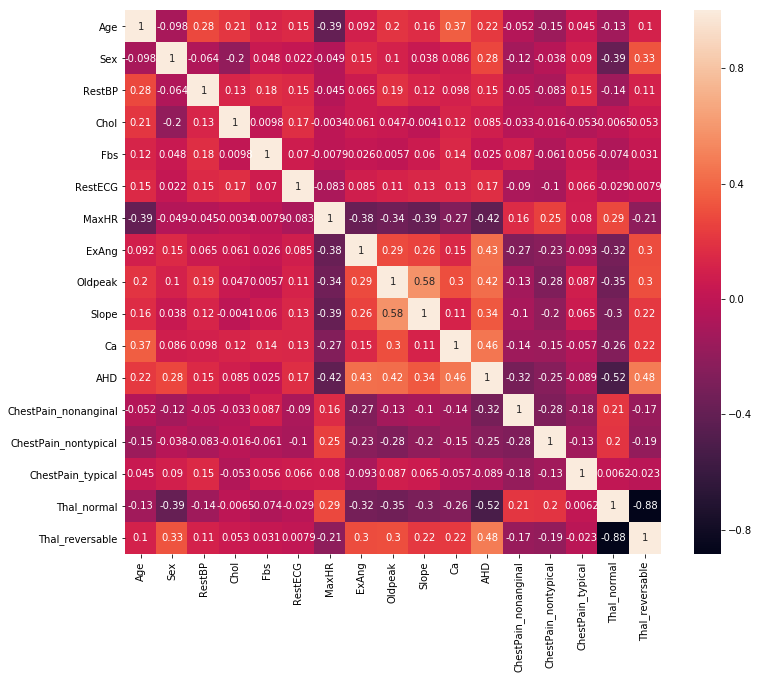

In [126]:
plt.figure(figsize=[12,10])
sns.heatmap(New.corr(),annot = True)
plt.show()

# Modelling using all the Independent  attributes

In [127]:
# IDV's and DV
x=New.drop('AHD',axis=1)
y=New.AHD
x.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0


# Train -Test Split for Data Modelling

In [128]:
# Train=70% and Test =30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [129]:
x_train.shape

(212, 16)

In [130]:
x_test.shape

(91, 16)

In [131]:
# Logistic Regression Model
lr= LogisticRegression() 
lr.fit(x_train,y_train) # fitting data into the model
pred_train = lr.predict(x_train) # Predicting with X_train
a_train = pd.crosstab(y_train,pred_train) # Confusion matrix between Y train and Y predicted
a_train

col_0,0,1
AHD,,
0,107,8
1,20,77


In [132]:
pred_test = lr.predict(x_test) # predicting using x_test
a_test = pd.crosstab(y_test,pred_test) # confusion matrix between y_test and y_pred
a_test=pd.DataFrame(a_test)
a_test


col_0,0,1
AHD,,
0,45,4
1,6,36


In [133]:
# Model evaluation using diff parameters
TN = a_test[0][0]
FN = a_test[0][1]
FP = a_test[1][0]
TP = a_test[1][1]
Total = a_test.sum().sum()
acc_test = (TP + TN) / Total
print(' Accuracy :%1.2f'%(acc_test*100))
err_test = (FP + FN) / Total
print('\n Error :%1.2f'%(err_test*100))
sens_test = (TP / (TP + FN))
print('\n Sensitivity :%1.2f'%(sens_test*100))
precision_test = (TP) / (TP + FP)
print('\n Precision :%1.2f'%(precision_test*100))
specificity_test = (TN) / (TN + FP)
print('\n Specificity :%1.2f'%(specificity_test*100))

 Accuracy :89.01

 Error :10.99

 Sensitivity :85.71

 Precision :90.00

 Specificity :91.84


# Model Summary 

In [134]:
x1 = add_constant(x_train)
logit = sm.Logit(y_train,x1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344101
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                           16
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.5010
Time:                        19:05:50   Log-Likelihood:                -72.949
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 3.880e-23
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7735      3.223     -0.861      0.389      -9.091       3.543

# AUC and ROC curve

The AUC for LOR is :88.78


C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


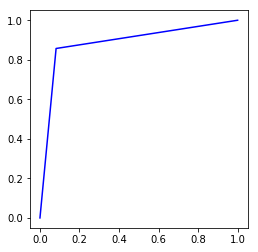

In [135]:
fpr,tpr,threshold = metrics.roc_curve(y_test,pred_test)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
AUC = metrics.auc(fpr,tpr)
print("The AUC for LOR is :%1.2f"%(AUC*100))

# Another Iteration-By removing certain attributes with high p value


In [136]:
'''New['Sex'] =New['Sex'].astype('category')
New['Fbs'] = New['Fbs'].astype('category')
New['RestECG'] =New['RestECG'].astype('category')
New['ExAng'] = New['ExAng'].astype('category')
New['Slope'] = New['Slope'].astype('category')'''

"New['Sex'] =New['Sex'].astype('category')\nNew['Fbs'] = New['Fbs'].astype('category')\nNew['RestECG'] =New['RestECG'].astype('category')\nNew['ExAng'] = New['ExAng'].astype('category')\nNew['Slope'] = New['Slope'].astype('category')"

# Modelling using few Independent  attributes

In [137]:
# IDV's and DV 1
x1=New.drop(['AHD','Fbs','Age','RestECG','Slope','Thal_normal','RestBP','Chol','ChestPain_typical','ChestPain_nontypical','ChestPain_nonanginal'],axis=1)
y1=New.AHD
x1.head()

,Sex,MaxHR,ExAng,Oldpeak,Ca,Thal_reversable
0,1,150,0,2.3,0.0,0
1,1,108,1,1.5,3.0,0
2,1,129,1,2.6,2.0,1
3,1,187,0,3.5,0.0,0
4,0,172,0,1.4,0.0,0


# Train -Test Split for Data Modelling

In [138]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

In [139]:
x1_train.shape

(212, 6)

In [140]:
x1_test.shape

(91, 6)

In [141]:

# Logistic Regression Model
lr1 = LogisticRegression()
lr1.fit(x1_train,y1_train)# fitting data into the model
pred_train1 = lr1.predict(x1_train)# Predicting with X_train
a_train1= pd.crosstab(y1_train,pred_train1)# Confusion matrix between Y train and Y predicted
a_train1

col_0,0,1
AHD,,
0,101,14
1,20,77


In [142]:
pred_test1= lr1.predict(x1_test)# Predicting with X_test
a_test1 = pd.crosstab(y1_test,pred_test1)# Confusion matrix between Y test and Y predicted
a_test1=pd.DataFrame(a_test1)
a_test1


col_0,0,1
AHD,,
0,42,7
1,7,35


In [143]:
TN = a_test1[0][0]
FN = a_test1[0][1]
FP = a_test1[1][0]
TP = a_test1[1][1]
Total = a_test1.sum().sum()
acc_test = (TP + TN) / Total
print(' Accuracy :%1.2f'%(acc_test*100))
err_test = (FP + FN) / Total
print('\n Error :%1.2f'%(err_test*100))
sens_test = (TP / (TP + FN))
print('\n Sensitivity :%1.2f'%(sens_test*100))
precision_test = (TP) / (TP + FP)
print('\n Precision :%1.2f'%(precision_test*100))
specificity_test = (TN) / (TN + FP)
print('\n Specificity :%1.2f'%(specificity_test*100))

 Accuracy :84.62

 Error :15.38

 Sensitivity :83.33

 Precision :83.33

 Specificity :85.71


In [144]:
x2 = add_constant(x1_train)
logit = sm.Logit(y1_train,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.380943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.4475
Time:                        19:05:51   Log-Likelihood:                -80.760
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 8.534e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5907      1.510      0.391      0.696      -2.369       3.551
Sex           

In [145]:
#pred_1 = lr1.predict_proba(x1_test)
#pred_2 = lr.predict_proba(x_train1

The AUC for LOR is :84.52


C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


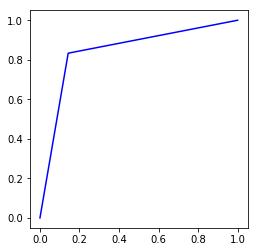

In [146]:
fpr,tpr,threshold = metrics.roc_curve(y1_test,pred_test1)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
AUC = metrics.auc(fpr,tpr)
print("The AUC for LOR is :%1.2f"%(AUC*100))

# All classification Model Comparisons

In [147]:
x1=New.drop(['AHD','Fbs','Age','RestECG','Slope','Thal_normal','RestBP','Chol','ChestPain_typical','ChestPain_nontypical','ChestPain_nonanginal'],axis=1)
y1=New.AHD
x_std=StandardScaler().fit_transform(x1)
x_std=pd.DataFrame(x_std,columns=x1.columns)
pd.DataFrame(x_std).head()
x_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,303.0,2.931282e-18,1.001654,-1.457296,-1.457296,0.686202,0.686202,0.686202
MaxHR,303.0,-1.179841e-16,1.001654,-3.442067,-0.705307,0.148562,0.717808,2.294182
ExAng,303.0,-4.470205e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
Oldpeak,303.0,-1.700144e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851
Ca,303.0,-1.176177e-16,1.001654,-0.711131,-0.711131,-0.711131,0.360873,2.504881
Thal_reversable,303.0,6.961795e-17,1.001654,-0.793116,-0.793116,-0.793116,1.260850,1.260850


# GridSearch for Best parameters for each Model

In [148]:


parameter_rf= {'n_estimators':np.arange(1,100),'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model=RandomForestClassifier(criterion='entropy',random_state=0)
parameter_dt = {'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model1=DecisionTreeClassifier(criterion='entropy',random_state=0)
parameter_kn = {'n_neighbors':np.arange(1,15)} 
# we are restricting the depth to 10 layers
model2=KNeighborsClassifier(weights='uniform',metric='euclidean')


In [149]:
GS_dt= GridSearchCV(model1,parameter_dt,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_dt.fit(x_std,y)
print(GS_dt.best_params_)

{'max_depth': 4}


In [150]:
GS_rf= GridSearchCV(model,parameter_rf,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_rf.fit(x_std,y)
print(GS_rf.best_params_)

{'max_depth': 3, 'n_estimators': 50}


In [151]:
GS_kn= GridSearchCV(model2,parameter_kn,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_kn.fit(x_std,y)
print(GS_kn.best_params_)

{'n_neighbors': 13}


In [152]:
# Decision Tree
DT_model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
DT_model.fit(x1_train,y1_train)
pred1=DT_model.predict(x1_test)

#Random Forest 
Rf_model=RandomForestClassifier(n_estimators=50,max_depth=3,criterion='entropy',random_state=0)
Rf_model.fit(x1_train,y1_train)
pred2=Rf_model.predict(x1_test)

#Navive Baye's 
Nb_model=GaussianNB()
Nb_model.fit(x1_train,y1_train)
pred3=Nb_model.predict(x1_test)

#Logistic Regression 
LOr_model=LogisticRegression()
LOr_model.fit(x1_train,y1_train)
pred4=LOr_model.predict(x1_test)

# KNN
Kn_model=KNeighborsClassifier(n_neighbors=13,weights='uniform',metric='euclidean')
Kn_model.fit(x1_train,y1_train)
pred5=Kn_model.predict(x1_test)

Decision Tree:  Performance Range is  (65.12 - 90.70) with a Varience error of (0.071085) and mean of 76.90
Random Forest:  Performance Range is  (69.77 - 90.70) with a Varience error of (0.063653) and mean of 81.85
Naive Bayes:  Performance Range is  (72.09 - 93.02) with a Varience error of (0.057230) and mean of 81.86
Logistic Regression:  Performance Range is  (72.09 - 95.35) with a Varience error of (0.064173) and mean of 83.17
KNN:  Performance Range is  (74.42 - 88.37) with a Varience error of (0.046370) and mean of 82.17


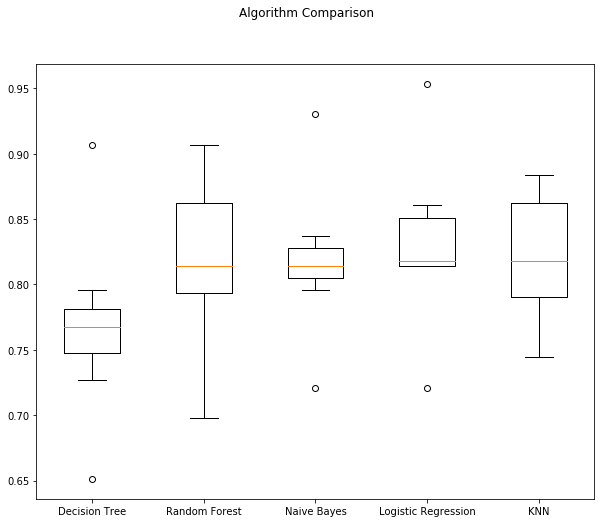

In [171]:
# kfold cross validation and Model comparison's
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
mod.append(('Naive Bayes',Nb_model))
mod.append(('Logistic Regression',LOr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=7,random_state=2)# 5 fold cross validation function
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg="%s:  Performance Range is  (%1.2f %s %1.2f) with a Varience error of (%f) and mean of %1.2f"%(name,cv_results.min()*100,'-',cv_results.max()*100,cv_results.std(),cv_results.mean()*100)
    print(msg)
# boxplot for the models

fig=plt.figure(figsize=[10,8])
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


# Another Combination

In [154]:
New1=pd.get_dummies(New,columns=['ExAng','Slope'],drop_first=True)
New1.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'Oldpeak',
       'Ca', 'AHD', 'ChestPain_nonanginal', 'ChestPain_nontypical',
       'ChestPain_typical', 'Thal_normal', 'Thal_reversable', 'ExAng_1',
       'Slope_2', 'Slope_3'],
      dtype='object')

In [155]:
# IDV's and DV 2
x2=New1.drop(['AHD','Fbs','Slope_3','Age','RestECG','Thal_normal','RestBP','Chol','MaxHR','ExAng_1'],axis=1)
y2=New1.AHD
x2.head()

,Sex,Oldpeak,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_reversable,Slope_2
0,1,2.3,0.0,0,0,1,0,0
1,1,1.5,3.0,0,0,0,0,1
2,1,2.6,2.0,0,0,0,1,1
3,1,3.5,0.0,1,0,0,0,0
4,0,1.4,0.0,0,1,0,0,0


In [156]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3,random_state = 1)

In [157]:
x2_train.shape

(212, 8)

In [158]:
x2_test.shape

(91, 8)

In [159]:
lr3 = LogisticRegression()
lr3.fit(x2_train,y2_train)
pred_train2 = lr3.predict(x2_train)
a_train2= pd.crosstab(y2_train,pred_train2)
a_train2

col_0,0,1
AHD,,
0,101,14
1,15,82


In [160]:
pred_test2= lr2.predict(x2_test)
a_test2 = pd.crosstab(y2_test,pred_test2)
a_test2=pd.DataFrame(a_test2)
a_test2


col_0,0,1
AHD,,
0,43,6
1,8,34


In [161]:
TN = a_test2[0][0]
FN = a_test2[0][1]
FP = a_test2[1][0]
TP = a_test2[1][1]
Total = a_test2.sum().sum()
acc_test = (TP + TN) / Total
print(' Accuracy :%1.2f'%(acc_test*100))
err_test = (FP + FN) / Total
print('\n Error :%1.2f'%(err_test*100))
sens_test = (TP / (TP + FN))
print('\n Sensitivity :%1.2f'%(sens_test*100))
precision_test = (TP) / (TP + FP)
print('\n Precision :%1.2f'%(precision_test*100))
specificity_test = (TN) / (TN + FP)
print('\n Specificity :%1.2f'%(specificity_test*100))

 Accuracy :84.62

 Error :15.38

 Sensitivity :80.95

 Precision :85.00

 Specificity :87.76


In [162]:
x2 = add_constant(x2_train)
logit = sm.Logit(y2_train,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.361097
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  212
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                  0.4763
Time:                        19:10:23   Log-Likelihood:                -76.553
converged:                       True   LL-Null:                       -146.18
                                        LLR p-value:                 3.383e-26
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3660      0.547     -4.327      0.000      -3.438      -1.294

The AUC for LOR is :84.35


C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


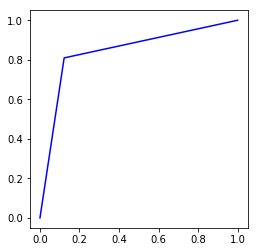

In [163]:
fpr,tpr,threshold = metrics.roc_curve(y2_test,pred_test2)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
AUC = metrics.auc(fpr,tpr)
print("The AUC for LOR is :%1.2f"%(AUC*100))